## 1. <a id='toc1_'></a>[Problem 1: Production economy and CO2 taxation](#toc0_)

**Question 1: Check market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)`. We choose $w=1$ as numeraire.**

Firstly, we check the market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)` with $w=1$ as numeraire. We initialize the necessary paramters using the `SimpleNamespace` class. This allows us to group related paramters such as productivity $A$, returns to scale $\gamma$, houshold preferences ($\alpha$, $\nu$ and $\epsilon$) and government policies ($\tau$ and $T$).

To include the firm's behaviour, we have defined these following functions:

- **labor_demand** computes the optimal labor demand based on the wage, price, productivity, and returns to scale.

- **prodcution** computes the output based on labor input and productivity.

- **profit** computes the firm's profit by substracting labor costs from revenue.

We have also included the household's behavior by defining the **utility_maximization** function. This function maximizes the consumer's utility given the budget constrains that includes wages, tranfers, and firm profits. The utilifty function incorporated the Cobb-Douglas utility form, which we have adjusted for the disutility of labor.

The **market_clearing_conditions** functions incorporates the firm's and household's behaviors. It calculates the labor demand and production for each firm, the profits, and the household's optimial labor supply and consumption. We have used the **fsolve** method from the **scipy.optimize** module to solve for the equilibrium labor supply that maximizes utility. We decided to use the **fsolve** function as it is well suited for solving systems of nonlinear equations. We also tried iterative methods and the **minimize** method from **scipy.optmize**, but these methods failed. Therefore, we switched to **fsolve** to adress the issues we encountered - We want to clarify that we are not entirely sure, if this is the most suited approach, but using **fsolve** mat effectively find the roors of the system of equations that represent the market clearing conditions.

**Imports and paramters**

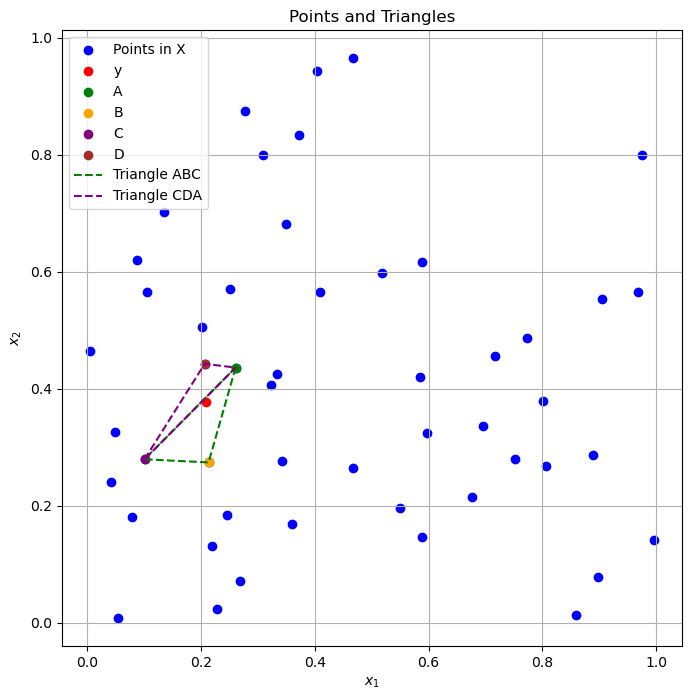

Barycentric coordinates w.r.t. triangle ABC: r1=0.629, r2=0.069, r3=0.302
Barycentric coordinates w.r.t. triangle CDA: r1=0.368, r2=-0.134, r3=0.766
The point y is inside triangle: ABC
True value of f(y): 0.079
Approximated value of f(y): 0.084
Point y is inside triangle: ABC
Point y: (0.2, 0.2)
  True value of f(y): 0.040
  Approximated value of f(y): 0.040
  Point y is inside triangle: ABC

Point y: (0.8, 0.2)
  True value of f(y): 0.160
  Approximated value of f(y): 0.159
  Point y is inside triangle: ABC

Point y: (0.8, 0.8)
  True value of f(y): 0.640
  Approximated value of f(y): nan
  Point y is inside triangle: none

Point y: (0.5, 0.5)
  True value of f(y): 0.250
  Approximated value of f(y): 0.251
  Point y is inside triangle: ABC



In [1]:
import numpy as np
from scipy.optimize import fsolve, minimize
import matplotlib.pyplot as plt
import QUESTION1 as q1
from QUESTION3 import find_points, barycentric_coordinates, approximate_f_y, plot_points_and_triangles, example_barycentric_and_containment, example_compute_approximation, example_for_all_points_in_Y
from types import SimpleNamespace
from QUESTION2 import initialise_parameters, simulate_error_term, calculate_utilities, plot_histogram, simulate_career_choice, calculate_results, plot_results, simulate_new_career_choice, calculate_new_results, plot_new_results


# Parameters
par = q1.par

Firstly, we check the market clearing conditions for $p_1$ in `linspace(0.1,2.0,10)` and $p_2$ in `linspace(0.1,2.0,10)` with $w=1$ as numeraire. We initialize the necessary paramters using the `SimpleNamespace` class. This allows us to group related paramters such as productivity $A$, returns to scale $\gamma$, houshold preferences ($\alpha$, $\nu$ and $\epsilon$) and government policies ($\tau$ and $T$).

To include the firm's behaviour, we have defined these following functions:

- **labor_demand** computes the optimal labor demad based on the wage, price, productivity, and returns to scale.

- **prodcution** computes the output based on labor input and productivity.

- **profit** computes the firm's profit by substracting labor costs from revenue.

We have also included the household's behavior by defining the **utility_maximization** function. This function maximizes the consumer's utility given the budget constrains that includes wages, tranfers, and firm profits. The utilifty function incorporated the Cobb-Douglas utility form, which we have adjusted for the disutility of labor.

The **market_clearing_conditions** functions incorporates the firm's and household's behaviors. It calculates the labor demand and production for each firm, the profits, and the household's optimial labor supply and consumption. We have used the **fsolve** method from the **scipy.optimize** module to solve for the equilibrium labor supply that maximizes utility. We decided to use the **fsolve** function as it is well suited for solving systems of nonlinear equations. We also tried iterative methods and the **minimize** method from **scipy.optmize**, but these methods failed. Therefore, we switched to **fsolve** to adress the issues we encountered - We want to clarify that we are not entirely sure, if this is the most suited approach, but using **fsolve** mat effectively find the roors of the system of equations that represent the market clearing conditions.

In [2]:
p1_values = np.linspace(0.1, 2.0, 10)
p2_values = np.linspace(0.1, 2.0, 10)

market_clearing_results = []

for p1 in p1_values:
    for p2 in p2_values:
        labor_market, goods_market_1, goods_market_2 = q1.market_clearing_conditions(p1, p2, q1.w)
        market_clearing_results.append((p1, p2, labor_market, goods_market_1, goods_market_2))

print("Market clearing conditions:")
for result in market_clearing_results:
    p1, p2, labor_market, goods_market_1, goods_market_2 = result
    print(f"p1: {p1:.3f}, p2: {p2:.3f}, Labor market: {labor_market:.3f}, Goods market 1: {goods_market_1:.3f}, Goods market 2: {goods_market_2:.3f}")


Market clearing conditions:
p1: 0.100, p2: 0.100, Labor market: 1.008, Goods market 1: 3.003, Goods market 2: 7.073
p1: 0.100, p2: 0.311, Labor market: 1.583, Goods market 1: 4.858, Goods market 2: 3.526
p1: 0.100, p2: 0.522, Labor market: 1.334, Goods market 1: 4.375, Goods market 2: 1.716
p1: 0.100, p2: 0.733, Labor market: 1.079, Goods market 1: 4.009, Goods market 2: 0.925
p1: 0.100, p2: 0.944, Labor market: 0.705, Goods market 1: 3.417, Goods market 2: 0.384
p1: 0.100, p2: 1.156, Labor market: 0.563, Goods market 1: 3.658, Goods market 2: 0.171
p1: 0.100, p2: 1.367, Labor market: 0.396, Goods market 1: 3.955, Goods market 2: 0.000
p1: 0.100, p2: 1.578, Labor market: 0.204, Goods market 1: 4.312, Goods market 2: -0.144
p1: 0.100, p2: 1.789, Labor market: -0.011, Goods market 1: 4.733, Goods market 2: -0.271
p1: 0.100, p2: 2.000, Labor market: -0.122, Goods market 1: 5.599, Goods market 2: -0.341
p1: 0.311, p2: 0.100, Labor market: 1.777, Goods market 1: 1.609, Goods market 2: 12.76

c:\Users\sara8\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
c:\Users\sara8\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:177: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


The output depicts the results of market clearing conditions for various combinations of $p_1$ and $p_2$. For each combination, the differences between supply and demand in the labor market, goods makret 1, and goods market 2 are calculated and displayed. The results when $p_1$ and $p_2$ ranges from 0.1 to 2.0, the labor market values range from positive to negative. This indicate and imbalance where labor supply does not exactly meet labor demand. Goods market 1 generally show large positive values, which suggests excess supply. Goods market 2 shows a mix of excess supply and demand. As $p_1$ increases, we observe similar patterns, but the markets do not consistently balance across all combinations. This may indicate that for given paramter values and specified range of prices, the markets do nor perfectly clear. The labor market and goods market do not simultaneously reach equilibrium at these price points, which suggests that there is a need for adjustments in either the prices or other paramters to achieve market equilibrium. Thus, we observe a mismatch, which may emphasize the sensitivity of market equilibrium to choosen prices and illustrates the complexities when it comes to malnacing multiple markets.

**Question 2: Find the equilibrium prices $p_1$ and $p_2$.<br>**
*Hint: you can use Walras' law to only check 2 of the market clearings*

We have used

$$
\begin{align*}
\ell_{j}^{\star}(w,p_{j})&=\left(\frac{p_{j}A\gamma}{w}\right)^{\frac{1}{1-\gamma}}
\end{align*}
$$

to define the **labor_demand**. The **prodcution** function computes the output based on the labot inout and productivity using 
$$
\begin{align*}
\\y_{j}=A\ell_{j}^{\gamma}.
\end{align*}
$$

The **profit** function computes the firm's profit by substracting labor costs from revenue, where the revenue is derived from the produced output. We received an **RuntimeWarning** when we intially started to solve the problem - This occured when we deinfed the **utility_maximization** function, which follows a Cobb-Douglass form adjusted for the disutility of labor. This warning likely arose due to invalid computations that could result from non-positive consumption values. We ensured that $c1$ and $c2$ were positive, where the function returns a very low utility value ($-\infty$) if either $c1$ or $c2$ is non-positive.

Again, we have utilized the **fsolve** method from **scipy.optimize** module to solve for the equilibrium labor supply that maximizes utility. We also used the hint, which states that is $n - 1$ markets are in equilibrium, the $n-th$ market must also be in equilibrium. Thus, we only need to check the labor market and goods market 1 clearing condition. The goods market 2 condition is implicitly met is the first two conditions are met (see py file for comment).

In [3]:
initial_guess = [1.0, 1.0]
equilibrium_prices = fsolve(q1.equilibrium_conditions, initial_guess)

print(f"Equilibrium prices: p1 = {equilibrium_prices[0]:.3f}, p2 = {equilibrium_prices[1]:.3f}")

Equilibrium prices: p1 = 0.976, p2 = 1.491


We obtain the equilibrium prices, which are $p1 = 0.976$ and $p2 = 1.491$. These equilibrium prices indicate the levels at which the goods produced by the two firms balance supply and demand in the markets, given the consumer's utility optimization and firms' profit maximization. These prices reflect the relative values of the goods in the economy, and ensures that the labor and goods market clear.

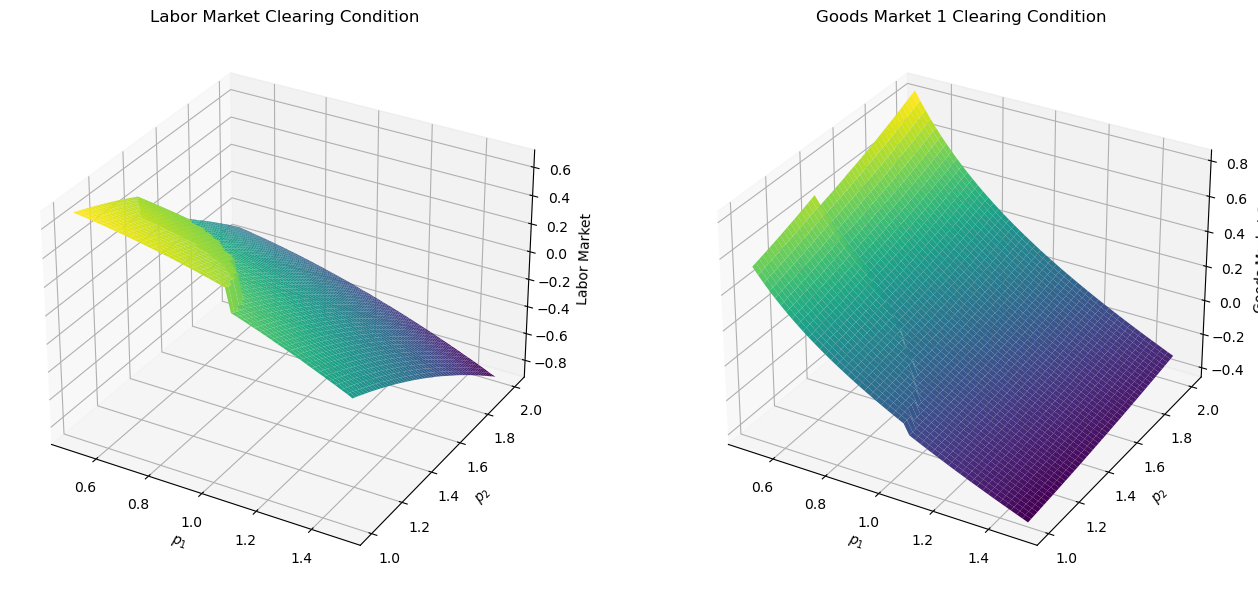

In [4]:
p1_values = np.linspace(0.5, 1.5, 50)
p2_values = np.linspace(1.0, 2.0, 50)
P1, P2 = np.meshgrid(p1_values, p2_values)

labor_market_clearing = np.zeros(P1.shape)
goods_market_1_clearing = np.zeros(P1.shape)

for i in range(P1.shape[0]):
    for j in range(P1.shape[1]):
        p1 = P1[i, j]
        p2 = P2[i, j]
        labor_market, goods_market_1 = q1.equilibrium_conditions([p1, p2])
        labor_market_clearing[i, j] = labor_market
        goods_market_1_clearing[i, j] = goods_market_1

fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(P1, P2, labor_market_clearing, cmap='viridis')
ax1.set_title('Labor Market Clearing Condition')
ax1.set_xlabel('$p_1$')
ax1.set_ylabel('$p_2$')
ax1.set_zlabel('Labor Market')

ax2 = fig.add_subplot(122, projection='3d')
ax2.plot_surface(P1, P2, goods_market_1_clearing, cmap='viridis')
ax2.set_title('Goods Market 1 Clearing Condition')
ax2.set_xlabel('$p_1$')
ax2.set_ylabel('$p_2$')
ax2.set_zlabel('Goods Market 1')

plt.tight_layout()
plt.show()

**Labor Market Clearing Condition**

The plot on the left shows the labor market claring condition. The z-axis shows the excess labor supply or demand. We aim to find the value at which these excess values are zero, which indicated market clearing. The equilibrium price combination $p1 = 0.976$ and $p2 = 1.491$ lies in the region where the labor market condition surface intersects the zero plane. This indicated that these prices, the total labor supplied by the consumer equals the total labor demanded by the firms.

**Goods Market 1 Clearing Condition**

The plot on the right shows the goods market 1 clearing condition. Similar to the labor plit, the z-axis shows the excess supply or demand in goods market 1. The equilibrium prices are found in the region where the surface intersects the zero plane - We observe that the quantity of good 1 produced by firm 1 equals the quantity of good 1 demanded by the consumer at around the euilibrium prices $p1 = 0.976$ and $p2 = 1.491$.

**Question 3 What values of $\tau$ and (implied) $T$ should the government choose to maximize $SWF$?**

To compute the equilibrium prices given the values of $\tau$ and $T$, we have defined the **compute_equilibrium_prices** function, which recomputes the equilibirum  prices by solving the market clearing conditions with the specific $\tau$ and $T$.
Next, we define the **social_welfare** function to calculate the social welfare given $\tau$ and $T$. This function uses the equilibirum prices and solved for labor and consumption values that maximize utility. We have attempted to ensure that consumption values and labor supply are positive before computing utility. The social welfare function is then calculated by adjusting the utility for the social cost of carbon emissions.

We **minimize** using **scipy.optimize** with the **L-BFGS-B** algorithm to find the optimal values of $\tau$ and $T$. This algorithm is mainly suited for large-scale optimization problems and allows for bound constraints on the variables - This is appropriate for our problem where  $\tau$ and $T$ must be non-negative. We could have used the Nelder-Mead method, but whis method may bot handle bound constraint as effectively, hence the L-BFGS-B being our optimal choice.

In [5]:
initial_guess_tau_T = [0.5, 1.0]
opt_results = minimize(q1.social_welfare, initial_guess_tau_T, bounds=[(0.01, None), (0.01, None)], method='L-BFGS-B')

optimal_tau, optimal_T = opt_results.x

print(f"Optimal tax: τ = {optimal_tau:.3f}, Optimal transfer: T = {optimal_T:.3f}")

Optimal tax: τ = 0.335, Optimal transfer: T = 1.333


The optimal tax rate and transfer amount that maximizes the social welfare are $\tau = 0.335$ and $T = 1.333$. These values may indicate that government intervention is needed to balance the trade-off between economic output and the social cost of carboun emissions, which can ensure maximum social welfare in the economy.

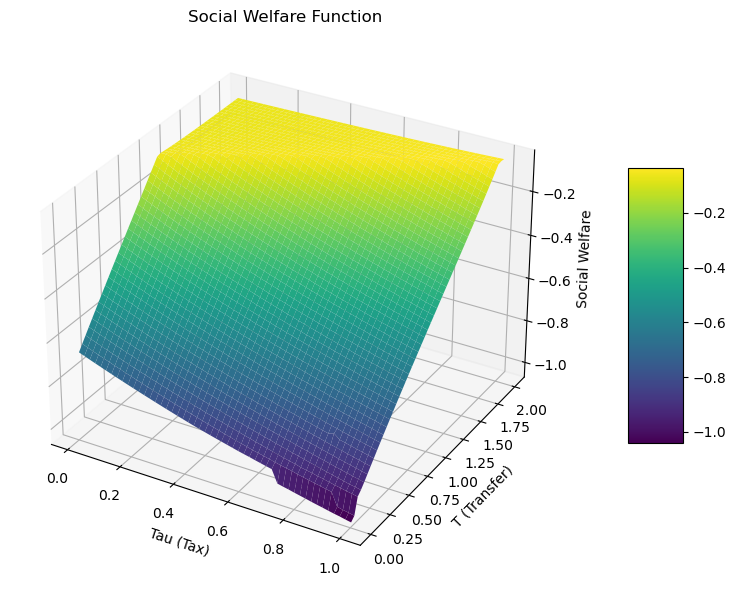

In [6]:
tau_values = np.linspace(0.01, 1.0, 50)
T_values = np.linspace(0.01, 2.0, 50)
TAU, T_GRID = np.meshgrid(tau_values, T_values)

SWF_values = np.zeros(TAU.shape)

for i in range(TAU.shape[0]):
    for j in range(TAU.shape[1]):
        tau = TAU[i, j]
        T = T_GRID[i, j]
        SWF_values[i, j] = -q1.social_welfare([tau, T])

fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(TAU, T_GRID, SWF_values, cmap='viridis')
ax.set_title('Social Welfare Function')
ax.set_xlabel('Tau (Tax)')
ax.set_ylabel('T (Transfer)')
ax.set_zlabel('Social Welfare')
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

The 3D surface plot visualizes the Social Welfare Function (SWF) over a range of tax rates $\tau$ and transfers $T$. The z-axis show the level of social welfare, where higher values indicate greater social welfare.

We observe how different combinations of $\tau$ and $T$ impact the SWF. Thus, there is a gradient of social welfare levels across different tax and transfer combinations.

- **Higher Social Welfare Region**: The yellow region of the surface represents the highest levels of social welfare. This region corresponds to the optimal values of $\tau$ and $T$ that maximize welfare.

- **Lower Social Welfare Region**: The purble region at the bottom of the surface shows the lowest levels of social welfare. This region correspinds to the combinations of $\tau$ and $T$ that are nonoptimal.

We observe that the optimal tax rate and transfer that maximize the SWF are around $\tau = 0.335$ and $T = 1.333$. These values are located at the highest point on the surface plot. Thus, the plot confirms that moderate values of tax and tranfers are optimal for maximizing social welfare.  Thus, it's important to note both extremly low and extremely high tax rates and tranfers lead to inefficincies. When taxes and transfers are too high, it can lead to inefficiencies and reduced labor supply, lowering social welfare. On the other hand, extremely low taxes and tranfers may fail to adress externalities and fund necessary public goods, thereby lowering social welfare. 

## 2. <a id='toc2_'></a>[Problem 2: Career choice model](#toc0_)

Consider a graduate $i$ making a choice between entering $J$ different career tracks. <br>
Entering career $j$ yields utility $u^k_{ij}$. This value is unknown to the graduate ex ante, but will ex post be: <br>
$$
    u_{i,j}^k = v_{j} + \epsilon_{i,j}^k
$$

They know that $\epsilon^k_{i,j}\sim \mathcal{N}(0,\sigma^2)$, but they do not observe $\epsilon^k_{i,j}$ before making their career choice. <br>

Consider the concrete case of $J=3$ with:
$$
\begin{align*}
    v_{1} &= 1 \\
    v_{2} &= 2 \\
    v_{3} &= 3
\end{align*}
$$

If the graduates know the values of $v_j$ and the distribution of $\epsilon_{i,j}^k$, they can calculate the expected utility of each career track using simulation: <br>
$$
    \mathbb{E}\left[ u^k_{i,j}\vert v_j \right] \approx v_j + \frac{1}{K}\sum_{k=1}^K \epsilon_{i,j}^k
$$

**Question 1:** Simulate and calculate expected utility and the average realised utility for $K=10000$ draws, for each career choice $j$.


The initialise_parameters() function is run to set the initial parameters, numbers of simulations, careers, baseline utilities, and graduates. It is also run to define the standard deviation for the error term. 

By running simulate_error_term(par) we generate a matrix consisting of the error terms for each career, simulation and uses a Gaussian distribution. The error terms are simulated by np.random.normal in order to create a matrix where each row is represented by a career and columns represent the number of simulations.
Then we calculate the utilities and the main() function as defined in our py-file integrates all the mentioned necessities.

We finally plot a histogram to visualise our realised utilities and the distribution by following each career path.

Career 1:
Expected Utility: 0.9957
Average Realised Utility: 0.9957
Career 2:
Expected Utility: 2.0271
Average Realised Utility: 2.0271
Career 3:
Expected Utility: 2.9751
Average Realised Utility: 2.9751


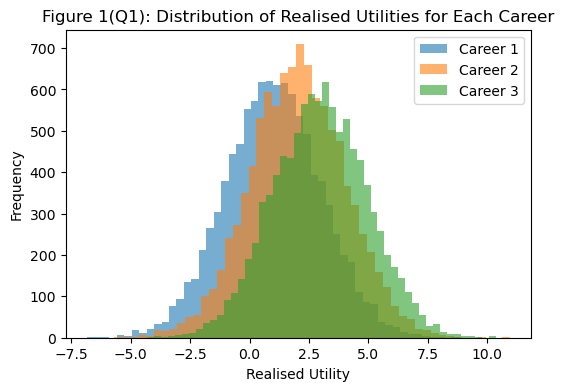

In [7]:
# Initialise parameters
par = initialise_parameters()

# Simulate error term
epsilon = simulate_error_term(par)

# Calculate utilities
expected_utility, realised_utility, average_realised_utility = calculate_utilities(par, epsilon)

# Display calculated utilities
for j in range(par.J):
    print(f"Career {j + 1}:")
    print(f"Expected Utility: {expected_utility[j]:.4f}")
    print(f"Average Realised Utility: {average_realised_utility[j]:.4f}")

# Plot histogram of realised utilities
plot_histogram(realised_utility, par)

*We see that the expected utilities for every career are very close to the average realised utilities. Due to LLN (Law of Large Numbers) this is expected since we simulate using a large number (K = 10000), and thus the average of the realised utilities should converge towards the expected value.*

*Moreover, it becomes clear that Career 1 is the career with lowest expected and average realised utility, whilst Career 3 has the highest of both. This aligns with the values assigned to v_{J} in the description of the problem. This shows that there is a proportional relationship between the values of v_{J} and the expected and average realised utilities, and thus does our simulation confirm that the choice of career follows the theoretical values of v_{J}. The distributions of the histograms appear to be Gaussian distributed, which is consistent with the assumption made of the error term being Gaussian distributed.* 
*In relation to the values of v_{J} we see that the distribution of Career 1 is centered around 1 in the Histogram whilst Career 2 and 3 are centered around 2 and 3 respectively. The distributions are seen overlapping, which indicates the variabilities between the career paths due to stochastic nature of the error term.*

*To sum it up our results indicate, that graduates can expect a higher utility by choosing careers with higher base values, but they should be aware of the variability in the realised utilities before making their decision.*

Now consider a new scenario: Imagine that the graduate does not know $v_j$. The *only* prior information they have on the value of each job, comes from their $F_{i}$ friends that work in each career $j$. After talking with them, they know the average utility of their friends (which includes their friends' noise term), giving them the prior expecation: <br>
$$
\tilde{u}^k_{i,j}\left( F_{i}\right) = \frac{1}{F_{i}}\sum_{f=1}^{F_{i}} \left(v_{j} + \epsilon^k_{f,j}\right), \; \epsilon^k_{f,j}\sim \mathcal{N}(0,\sigma^2)
$$
For ease of notation consider that each graduate have $F_{i}=i$ friends in each career. <br>

For $K$ times do the following: <br>
1. For each person $i$ draw $J\cdot F_i$ values of $\epsilon_{f,j}^{k}$, and calculate the prior expected utility of each career track, $\tilde{u}^k_{i,j}\left( F_{i}\right)$. <br>
Also draw their own $J$ noise terms, $\epsilon_{i,j}^k$
1. Each person $i$ chooses the career track with the highest expected utility: $$j_i^{k*}= \arg\max_{j\in{1,2\dots,J}}\left\{ \tilde{u}^k_{i,j}\left( F_{i}\right)\right\} $$
1. Store the chosen careers: $j_i^{k*}$, the prior expectation of the value of their chosen career: $\tilde{u}^k_{i,j=j_i^{k*}}\left( F_{i}\right)$, and the realized value of their chosen career track: $u^k_{i,j=j_i^{k*}}=v_{j=j_i^{k*}}+\epsilon_{i,j=j_i^{k*}}^k$.

Chosen values will be: <br>
$i\in\left\{1,2\dots,N\right\}, N=10$ <br>
$F_i = i$<br>
So there are 10 graduates. The first has 1 friend in each career, the second has 2 friends, ... the tenth has 10 friends.

**Question 2:** Simulate and visualize: For each type of graduate, $i$, the share of graduates choosing each career, the average subjective expected utility of the graduates, and the average ex post realized utility given their choice. <br>
That is, calculate and visualize: <br>
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \mathbb{I}\left\{ j=j_i^{k*} \right\}  \;\forall j\in\left\{1,2,\dots,J\right\}
\end{align*}
$$
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} \tilde{u}^k_{ij=j_i^{k*}}\left( F_{i}\right)
\end{align*}
$$
And 
$$
\begin{align*}
    \frac{1}{K} \sum_{k=1}^{K} u^k_{ij=j_i^{k*}} 
\end{align*}
$$
For each graduate $i$.

We start by simulating the career choices and then calculating the results of the share of graduates who choose between career 1, 2, and 3, their expecte utilities of each career before working, and their realised utilities. 

Then we plot these. The functions have been defined in the py-file 'Problem2' and are called in the following code to display their results.

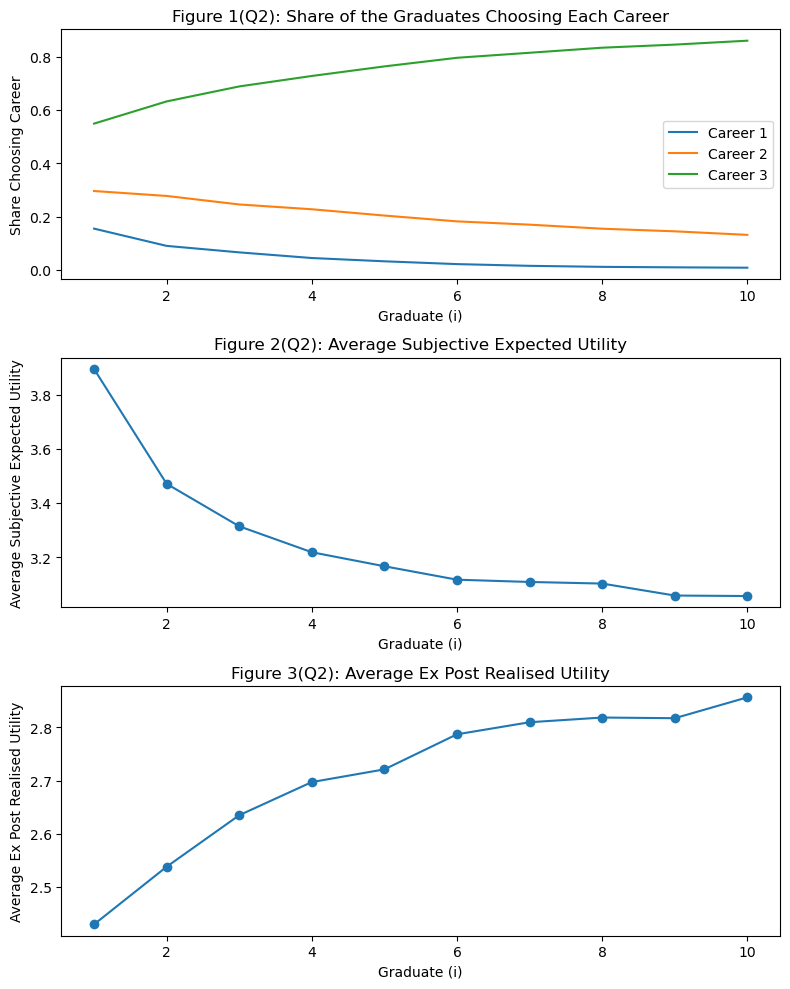

In [8]:
# Simulate career choice
chosen_careers, expectations_before, realised_utilities = simulate_career_choice(par)

# Calculate results of career choice simulation
career_share, average_subjective_utility, average_realised_utility = calculate_results(par, chosen_careers, expectations_before, realised_utilities)

# Plot results of career choice simulation
plot_results(par, career_share, average_subjective_utility, average_realised_utility)

*Figure 1 shows that the amount of graduates choosing Career 1 as their chosen career path is decreasing with the amount of friends. Likewise the amount decreases for Career 2, but slightly less than the decrease for Career 1. Thus neither Career 1 and 2 are the most attractive options when the graduates have more information.*
*The amount of graduates choosing Career 3 on the other hand increases with the number of friends, which indicates that this career path, which also has the highest base utility v_{3} = 3, becomes the most attractive path for graduates to takes when they have more friends to provide them with more information.*

*Figure 2 shows that the average subjective expected utility is decreasing with the number of friends. This is due to that the less friends the graduates have the more likely they are to overestimate the utlility in a certain career path due to not having enough information. When the number of friends increase the information about each career also increases, and thus the subjective expected utility nears a more accurate estimation.*

*Figure 3 shows that the average ex post realised utility, unlike the expected utility, increases with the number of friends which can be due to that the more friends a graduate have, the better information they have about the utilities of each career path and thereby make smarter career choices and earn a higher realised utility.*

*So to sum it up, the more friends graduates have the more their excpected utilities near the true values, and the smarter choices they make when choosing their career path, reflecting increased information about which career path gives the highest utility, which also is seen in Figure 1 where we see that the amount of graduates choosing Career 3, which also has the higheste baseline utility, as their path grows with the amount of friends one has.*

After a year of working in their career, the graduates learn $u^k_{ij}$ for their chosen job $j_i^{k*}$ perfectly. <br>
The can switch to one of the two remaining careers, for which they have the same prior as before, but it will now include a switching cost of $c$ which is known.
Their new priors can be written as: 
$$
\tilde{u}^{k,2}_{ij}\left( F_{i}\right) = \begin{cases}
            \tilde{u}^k_{ij}\left( F_{i}\right)-c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

We will set $c=1$.

Their realized utility will be: <br>
$$
u^{k,2}_{ij}= \begin{cases}
            u_{ij}^k -c & \text{if } j \neq j_i^{k*} \\
            u_{ij=j_i^{k*}} & \text{if } j = j_i^{k*}
        \end{cases}
$$

**Question 3:** Following the same approach as in question 2, find the new optimal career choice for each $i$, $k$. Then for each $i$, calculate the average subjective expected utility from their new optimal career choice, and the ex post realized utility of that career. Also, for each $i$, calculate the share of graduates that chooses to switch careers, conditional on which career they chose in the first year. <br>

In this Question we do the same as in Question 2, but define new functions to plot the results and simulate the process of career now including a switching cost for the graduates.
The function simulate_new_career_choice(par, chosen_careers, expectations_before, realised_utilities) simulates the graduates' new choice of career path whilst considering the switching cost (included in 'par'). We calculate the new results by calling the function calculate_new_results(par, chosen_careers, decisions_to_switch, new_expectations_before, new_realised_utilities). 
Finally we plot the results considering a switching cost, c = 1.

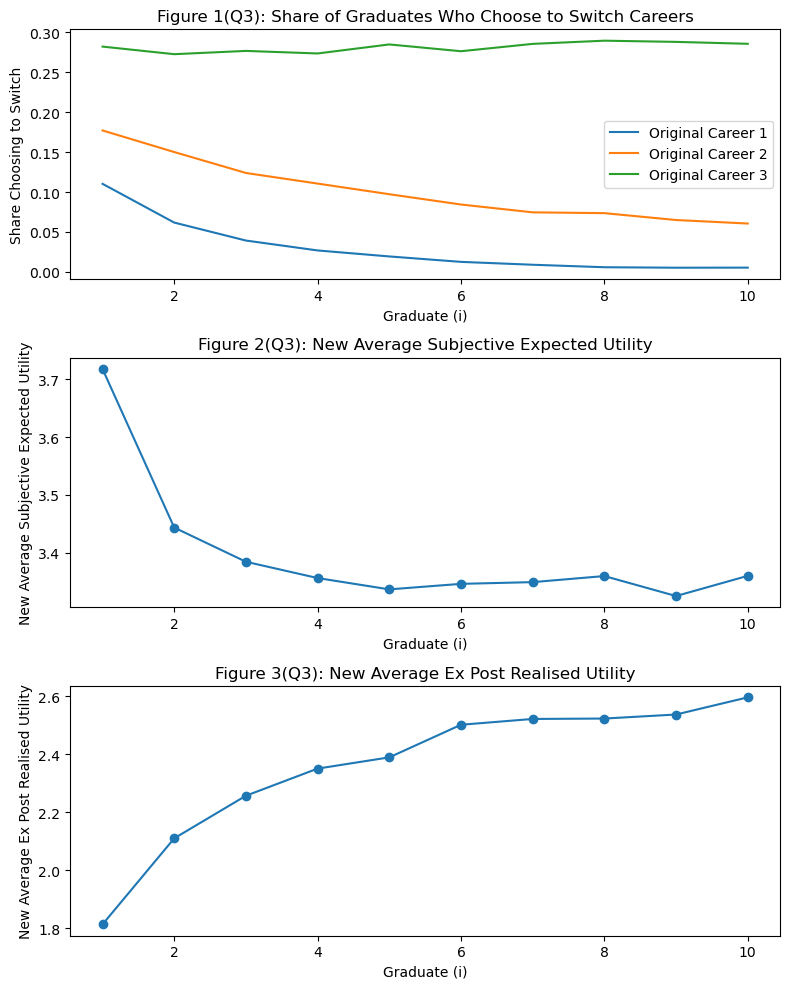

In [9]:
# Simulate new career choice with switching decisions
new_chosen_careers, new_expectations_before, new_realised_utilities, decisions_to_switch = simulate_new_career_choice(par, chosen_careers, expectations_before, realised_utilities)

# Calculate new results of career choice simulation with switching
new_average_subjective_utility, new_average_realised_utility, switch_share = calculate_new_results(par, chosen_careers, decisions_to_switch, new_expectations_before, new_realised_utilities)

# Plot new results of career choice simulation with switching
plot_new_results(par, switch_share, new_average_subjective_utility, new_average_realised_utility)

*By introducing a switching cost we see different results from the simulation compared to those in Question 2.*

*Figure 1 shows that the amount of graduates who initially chose Career 1 are most likely to switch careers as they gather more information and realise the low utility in the career. However, this trend decreases the more friends they have as the original choice is more informed. Likewise there is a similar trend for Career 2, but less evident compared to Career 1. However, graduates who choose Career 2 as their chosen path are less likely to switch career the more friends they have as the utility is moderate. Compared to Question 2 the decreases in the share of graduates who switch careers is less now, which must be due to the implementation of a switching cos, c = 1.*
*The graduates who initially chose Career 3 as their chosen career are less likely to switch career due to this path having the highest base utility. These results thus indicate that graduates with more friends, and thereby more information, make more well-informed initial decisions, reducing their need for switching careers.*

*Figure 2 shows that the new average subjective expected utility decreases in the beginning as the number of friends increase, but then stabilises a bit after around 4 friends. This suggests that graduates initially overestimate benefits of switching careers, but as they gain more friends and more information their subjective expected utility becomes more stable and adjusts. These findings align well with our results in the previous questions and a realistic understanding of the career utilities.*

*Figure 3 shows that the new average ex post realised utility increases with the number of friends, which indicates that graduates who have more friends make better choices in their career, even after accounting for the switching cost. More friends means better decision-making, as mentioned in Question 2 and therefore higher realised utility.*

## 3. <a id='toc3_'></a>[Problem 3: Barycentric interpolation](#toc0_)

**Problem:** We have a set of random points in the unit square,

$$
\mathcal{X} = \{(x_1,x_2)\,|\,x_1\sim\mathcal{U}(0,1),x_2\sim\mathcal{U}(0,1)\}.
$$

For these points, we know the value of some function $f(x_1,x_2)$,

$$
\mathcal{F} = \{f(x_1,x_2) \,|\, (x_1,x_2) \in \mathcal{X}\}.
$$

Now we want to approximate the value $f(y_1,y_2)$ for some  $y=(y_1,y_2)$, where $y_1\sim\mathcal{U}(0,1)$ and $y_2\sim\mathcal{U}(0,1)$.

**Building block I**

For an arbitrary triangle $ABC$ and a point $y$, define the so-called barycentric coordinates as:

$$
\begin{align*}
  r^{ABC}_1 &= \frac{(B_2-C_2)(y_1-C_1) + (C_1-B_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_2 &= \frac{(C_2-A_2)(y_1-C_1) + (A_1-C_1)(y_2-C_2)}{(B_2-C_2)(A_1-C_1) + (C_1-B_1)(A_2-C_2)} \\
  r^{ABC}_3 &= 1 - r_1 - r_2.
\end{align*}
$$

If $r^{ABC}_1 \in [0,1]$, $r^{ABC}_2 \in [0,1]$, and $r^{ABC}_3 \in [0,1]$, then the point is inside the triangle.

We always have $y = r^{ABC}_1 A + r^{ABC}_2 B + r^{ABC}_3 C$.

**Building block II**

Define the following points:

$$
\begin{align*}
A&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}>y_{2}\\
B&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}>y_{1}\text{ and }x_{2}<y_{2}\\
C&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}<y_{2}\\
D&=\arg\min_{(x_{1},x_{2})\in\mathcal{X}}\sqrt{\left(x_{1}-y_{1}\right)^{2}+\left(x_{2}-y_{2}\right)^{2}}\text{ s.t. }x_{1}<y_{1}\text{ and }x_{2}>y_{2}.
\end{align*}
$$

**Algorithm:**

1. Compute $A$, $B$, $C$, and $D$. If not possible return `NaN`.
1. If $y$ is inside the triangle $ABC$ return $r^{ABC}_1 f(A) + r^{ABC}_2 f(B) + r^{ABC}_3 f(C)$.
1. If $y$ is inside the triangle $CDA$ return $r^{CDA}_1 f(C) + r^{CDA}_2 f(D) + r^{CDA}_3 f(A)$.
1. Return `NaN`.

**Questions 1: Find $A$, $B$, $C$ and $D$. Illustrate these together with $X$, $y$ and the triangles $ABC$ and $CDA$.**

We aim to find the points $A$,$B$,$C$ and $D$ from a set of random points $X$ in the unit square and illustrate these points along with the random point y and the triangles $ABC$ and $CDA$. Thus, we will attempt to demonstrate the relationship between these points and how they form triangles around $y$.

We utilize the random point generation that was already given in the problem - This will ensure that the points, $X$ and $y$, are uniformly distributed within the unit square (which is also depicted in the graph below).

We define a function **find_points** to identify the points $A$,$B$,$C$ and $D$ around $y$ based on their relative positions. The function iterates through each point in $X$ and computes the distance to y, checking conditions to determine whether a point qualifies as $A$,$B$,$C$ or $D$. $A$ is the closest point with both coordinates greater than those of $y$, $B$ with $x1$ and $x2$ less, $C$ with both coordinates less, and $D$ with $x1$ less and $x2$ greater.

We then define a function **barycentric_coordinates** to calculate the barycentric coordinates $r1$, $r2$ and $r3$ for the point $y$ with respect to the triangles $ABC$ and $CDA$. 

Next we define the **approximate_f_y** function to use the barycentric coordinates to approximate $f(y)$ based in which triangle y is inside. The function utilizes the algorithm describes in the task.

Lastly, we plot the points $X$, $y$, $A$, $B$, $C$ and $D$ and draw the triangles $ABD$ and $CDA$ using **matplotlib**. The plot includes $X$ in blue, the point $y$ in red and the points $A$,$B$,$C$ and $D$ in green, orange, purple and brown respectively. We aslo draw dashed lines to represent the triangles ABC and CDA using green and purple.

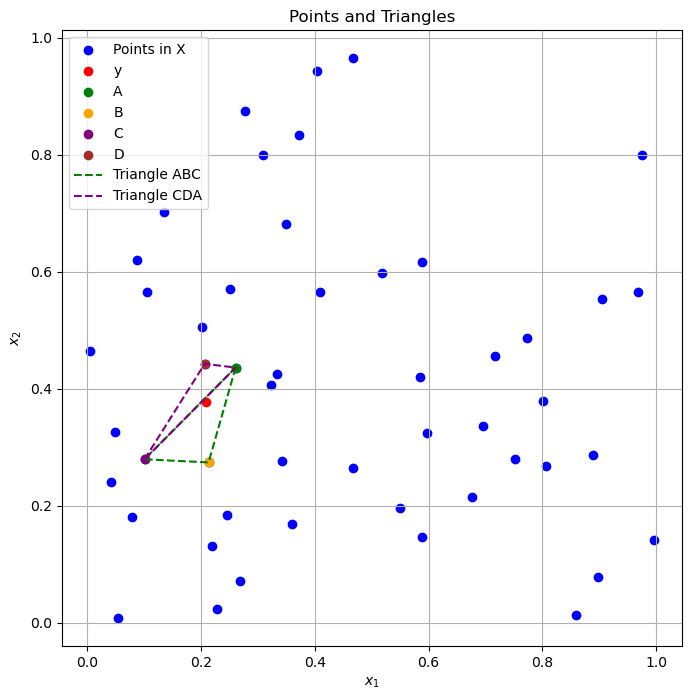

In [10]:
# Given function
f = lambda x: x[0] * x[1]

# Generate points in the unit square
rng = np.random.default_rng(2024)
X = rng.uniform(size=(50, 2))
F = np.array([f(x) for x in X])

## Question 1: Illustrate points

# Example usage for a single point y
y = rng.uniform(size=(2,))
A, B, C, D = find_points(X, y)
plot_points_and_triangles(X, y, A, B, C, D)

The above plot shows the points in $X$, $y$, $A$, $C$, and $D$. The dashed lines form the triangles $ABC$ and $CDA$. This helps us understand the relationsship between y and the sorrounding points. It shows that the points are selected based on their relative positions to $y$.

**Question 2:** Compute the barycentric coordinates of the point $y$ with respect to the triangles $ABC$ and $CDA$. Which triangle is $y$ located inside?

In [11]:
## Question 2: Compute Barycentric Coordinates and Determine Triangle Containment
example_barycentric_and_containment(y, A, B, C, D)

Barycentric coordinates w.r.t. triangle ABC: r1=0.629, r2=0.069, r3=0.302
Barycentric coordinates w.r.t. triangle CDA: r1=0.368, r2=-0.134, r3=0.766
The point y is inside triangle: ABC


**Question 3: Compute the approximation of $f(y)$ using the full algorithm. Compare with the true value.**

Here, we aim to compute the approximation of the function $f(y)$ using the full algorithm and compare it with the true value of $f(y)$. The function is defined as $f(x_1,x_2) = x_1 \cdot x_2$. We compute the function values $F$ for the points in $X$, use the barycentric coordinated to approximate $f(y)$ and then compare the resutls to the true value. As given in the task, the function $f$ is defined as a lambda function, calculated $F$ for the points in $X$, and then uses the **approximate_f_y** to compute the approximation of $f(y)$. The true value of $f(y)$ is also calculated using the same function definition.

In [12]:
## Question 3: Compute and compare approximation
example_compute_approximation(y, X, F)

True value of f(y): 0.079
Approximated value of f(y): 0.084
Point y is inside triangle: ABC


The results indicate that the approximation, $0.084$ is fairly close to the true value, $0.079$. The point $y$ also lies inside the triangle $ABC$ (which can also be seen in the graph above). Thus, we show that the true and approximated values are close, which demonstartes the accuracy of the interpolation method.

**Question 4: Repeat question 3 for all points in the set $Y$.**

Now, we repeat the process from question 3 for all points in the set of the specficed $Y$. The code iterated over each point in $Y$, computed the true value and the approximated value of $f(y)$ using the approximate_f_y function, and stores the result.

In [13]:
## Question 4: Repeat for all points in Y
Y = [(0.2, 0.2), (0.8, 0.2), (0.8, 0.8), (0.5, 0.5)]
example_for_all_points_in_Y(Y, X, F)

Point y: (0.2, 0.2)
  True value of f(y): 0.040
  Approximated value of f(y): 0.040
  Point y is inside triangle: ABC

Point y: (0.8, 0.2)
  True value of f(y): 0.160
  Approximated value of f(y): 0.159
  Point y is inside triangle: ABC

Point y: (0.8, 0.8)
  True value of f(y): 0.640
  Approximated value of f(y): nan
  Point y is inside triangle: none

Point y: (0.5, 0.5)
  True value of f(y): 0.250
  Approximated value of f(y): 0.251
  Point y is inside triangle: ABC



The output shows the true value of $f(y)$, the approximated value of $f(y)$ and the triange in which $y$ is lovated for each point in Y. For example, we see for $y=(0.2,0.2)$ the true and approximated values are both around $0.40$ and $y$ is inside triange $ABC$. For $y=(0.8,0.8)$ the approximation is not possible (nan) and y is therefore not inside any triangle.